In [2]:
!easy_install fancyimpute

Searching for fancyimpute
Best match: fancyimpute 0.4.2
Adding fancyimpute 0.4.2 to easy-install.pth file

Using /anaconda3/lib/python3.6/site-packages
Processing dependencies for fancyimpute
Finished processing dependencies for fancyimpute


In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,f1_score
from pandas.api.types import is_string_dtype,is_numeric_dtype
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
from fancyimpute import SimpleFill, KNN, SoftImpute, IterativeSVD, IterativeImputer, MatrixFactorization, NuclearNormMinimization, BiScaler

%matplotlib inline

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Data Preprocessing:  Data Split, Drop Useless Columns, Imputation, Feature Convertion,  Scaling

In [1]:
%pwd

'C:\\Users\\Thinkpad\\Desktop\\CS Study\\6105 Data Science\\Final'

In [5]:
path = '/Users/Thinkpad/Desktop/CS Study/6105 Data Science/Final'

In [6]:
df = pd.read_csv(f'{path}/data7.csv')
print(df.shape)
df.head(20)

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,unnamed
0,8670,M,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,...,26.00,124.90,1156.0,0.15460,0.23940,0.37910,0.15140,0.2837,0.08019,NaN
1,8913,B,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,...,15.54,87.40,577.0,0.09616,0.11470,0.11860,0.05366,0.2309,0.06915,NaN
2,8915,B,NaN,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,...,26.19,109.10,809.8,0.13130,0.30300,0.18040,0.14890,0.2962,0.08472,NaN
3,9047,B,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,...,23.02,89.69,580.9,0.11720,0.19580,0.18100,0.08388,0.3297,0.07834,NaN
4,85715,M,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,...,27.95,102.80,759.4,0.17860,0.41660,0.50060,0.20880,0.3900,0.11790,NaN
5,86208,M,20.26,23.03,132.40,NaN,0.09078,0.13130,0.14650,0.08683,...,31.59,156.10,1750.0,0.11900,0.35390,0.40980,0.15730,0.3689,0.08368,NaN
6,86211,B,12.18,17.84,77.79,451.1,0.10450,0.07057,0.02490,0.02941,...,20.92,82.14,495.2,0.11400,0.09358,0.04980,0.05882,0.2227,0.07376,NaN
7,86355,M,22.27,19.67,152.80,1509.0,0.13260,0.27680,0.42640,0.18230,...,28.01,206.80,2360.0,0.17010,0.69970,0.96080,0.29100,0.4055,0.09789,NaN
8,86408,B,12.63,20.76,82.15,480.4,0.09933,0.12090,0.10650,0.06021,...,25.47,89.00,527.4,0.12870,0.22500,0.22160,0.11050,0.2226,0.08486,NaN
9,86409,B,14.26,19.65,97.83,629.9,0.07837,0.22330,0.30030,0.07798,...,23.73,107.00,709.0,0.08949,0.41930,NaN,0.15050,0.2398,0.10820,NaN


In [225]:
# Drop the two useless column :unnamed, id
df_1 = df.drop(["unnamed","id"],axis = 1)
print(df_1.shape)
df_1.head(3)

(569, 31)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,15.46,19.48,101.70,748.9,0.10920,0.12230,0.1466,0.08087,0.1931,...,19.26,26.00,124.9,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019
1,B,12.89,13.12,81.89,515.9,0.06955,0.03729,0.0226,0.01171,0.1337,...,13.62,15.54,87.4,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
2,B,NaN,19.10,97.03,687.3,0.08992,0.09823,0.0594,0.04819,NaN,...,16.25,26.19,109.1,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472


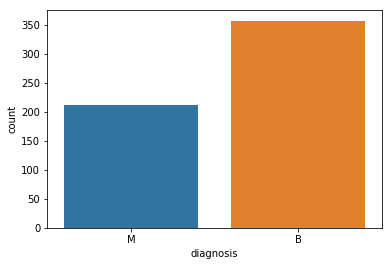

In [226]:
# Overview of the diagnosis of the data
sns.countplot(df_1['diagnosis'],label="Count")

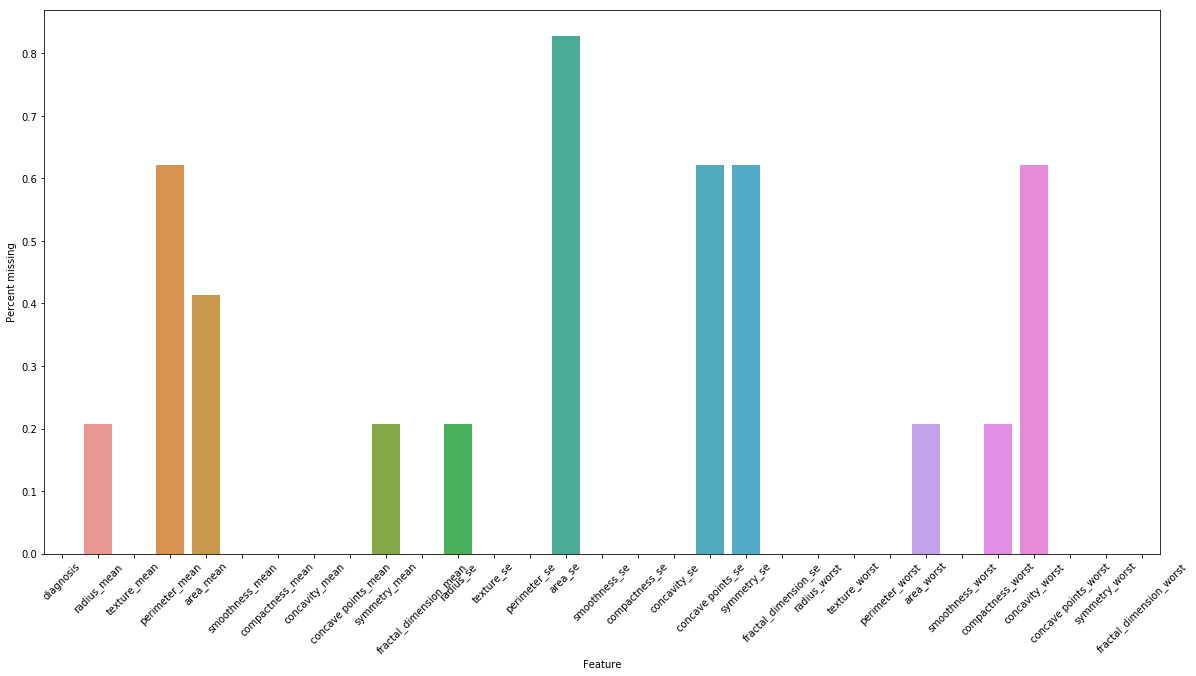

In [236]:
# Let's check whether there is a missing value

null_vals = df_1.isnull().sum()/len(df_trn_1)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (20,10))
plt.xticks(rotation=45)
sns.barplot(x = "Feature",y ="Percent missing",data = null_vals)

In [237]:
#Define a function to convert object types and string types to category type
def str_to_cat(my_df):
    for p,q in my_df.items(): #my_df.items() is a generator in Python
        if is_string_dtype(q): 
            my_df[p] = q.astype('category').cat.as_ordered()
    return my_df

#Define a function to convert catalogical feature to numerical value
def mydf_to_nums(df):
    df_copy = df.copy()
    for label, value in df.items():
        if not is_numeric_dtype(value):
            df_copy[label] = value.cat.codes
    return df_copy

In [238]:
df_1.head(20)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,...,19.26,26.00,124.90,1156.0,0.15460,0.23940,0.37910,0.15140,0.2837,0.08019
1,0,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.11470,0.11860,0.05366,0.2309,0.06915
2,0,NaN,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,NaN,...,16.25,26.19,109.10,809.8,0.13130,0.30300,0.18040,0.14890,0.2962,0.08472
3,0,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,0.1735,...,13.86,23.02,89.69,580.9,0.11720,0.19580,0.18100,0.08388,0.3297,0.07834
4,1,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,...,15.67,27.95,102.80,759.4,0.17860,0.41660,0.50060,0.20880,0.3900,0.11790
5,1,20.26,23.03,132.40,NaN,0.09078,0.13130,0.14650,0.08683,0.2095,...,24.22,31.59,156.10,1750.0,0.11900,0.35390,0.40980,0.15730,0.3689,0.08368
6,0,12.18,17.84,77.79,451.1,0.10450,0.07057,0.02490,0.02941,0.1900,...,12.83,20.92,82.14,495.2,0.11400,0.09358,0.04980,0.05882,0.2227,0.07376
7,1,22.27,19.67,152.80,1509.0,0.13260,0.27680,0.42640,0.18230,0.2556,...,28.40,28.01,206.80,2360.0,0.17010,0.69970,0.96080,0.29100,0.4055,0.09789
8,0,12.63,20.76,82.15,480.4,0.09933,0.12090,0.10650,0.06021,0.1735,...,13.33,25.47,89.00,527.4,0.12870,0.22500,0.22160,0.11050,0.2226,0.08486
9,0,14.26,19.65,97.83,629.9,0.07837,0.22330,0.30030,0.07798,0.1704,...,15.30,23.73,107.00,709.0,0.08949,0.41930,NaN,0.15050,0.2398,0.10820


In [239]:
df_1 = str_to_cat(df_1)

In [240]:
df_1 = mydf_to_nums(df_1)

In [241]:
# now we can see M and B of diagnosis has been mapped to 1 and 0
df_1.head(13)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,...,19.26,26.00,124.90,1156.0,0.15460,0.23940,0.37910,0.15140,0.2837,0.08019
1,0,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.11470,0.11860,0.05366,0.2309,0.06915
2,0,NaN,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,NaN,...,16.25,26.19,109.10,809.8,0.13130,0.30300,0.18040,0.14890,0.2962,0.08472
3,0,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,0.1735,...,13.86,23.02,89.69,580.9,0.11720,0.19580,0.18100,0.08388,0.3297,0.07834
4,1,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,...,15.67,27.95,102.80,759.4,0.17860,0.41660,0.50060,0.20880,0.3900,0.11790
5,1,20.26,23.03,132.40,NaN,0.09078,0.13130,0.14650,0.08683,0.2095,...,24.22,31.59,156.10,1750.0,0.11900,0.35390,0.40980,0.15730,0.3689,0.08368
6,0,12.18,17.84,77.79,451.1,0.10450,0.07057,0.02490,0.02941,0.1900,...,12.83,20.92,82.14,495.2,0.11400,0.09358,0.04980,0.05882,0.2227,0.07376
7,1,22.27,19.67,152.80,1509.0,0.13260,0.27680,0.42640,0.18230,0.2556,...,28.40,28.01,206.80,2360.0,0.17010,0.69970,0.96080,0.29100,0.4055,0.09789
8,0,12.63,20.76,82.15,480.4,0.09933,0.12090,0.10650,0.06021,0.1735,...,13.33,25.47,89.00,527.4,0.12870,0.22500,0.22160,0.11050,0.2226,0.08486
9,0,14.26,19.65,97.83,629.9,0.07837,0.22330,0.30030,0.07798,0.1704,...,15.30,23.73,107.00,709.0,0.08949,0.41930,NaN,0.15050,0.2398,0.10820


In [244]:
# We will use KNN to imputate the invalid data
df_1 = pd.DataFrame(KNN(k=3).fit_transform(df_1),
                                  index=df_1.index, columns=df_1.columns)

Imputing row 1/569 with 0 missing, elapsed time: 0.087
Imputing row 101/569 with 0 missing, elapsed time: 0.088
Imputing row 201/569 with 1 missing, elapsed time: 0.088
Imputing row 301/569 with 0 missing, elapsed time: 0.088
Imputing row 401/569 with 0 missing, elapsed time: 0.089
Imputing row 501/569 with 0 missing, elapsed time: 0.089


In [245]:
df_1.head(13)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,15.460000,19.48,101.70,748.900000,0.10920,0.12230,0.14660,0.08087,0.193100,...,19.26,26.00,124.90,1156.0,0.15460,0.23940,0.379100,0.15140,0.2837,0.08019
1,0.0,12.890000,13.12,81.89,515.900000,0.06955,0.03729,0.02260,0.01171,0.133700,...,13.62,15.54,87.40,577.0,0.09616,0.11470,0.118600,0.05366,0.2309,0.06915
2,0.0,14.979787,19.10,97.03,687.300000,0.08992,0.09823,0.05940,0.04819,0.182167,...,16.25,26.19,109.10,809.8,0.13130,0.30300,0.180400,0.14890,0.2962,0.08472
3,0.0,12.940000,16.17,83.18,507.600000,0.09879,0.08836,0.03296,0.02390,0.173500,...,13.86,23.02,89.69,580.9,0.11720,0.19580,0.181000,0.08388,0.3297,0.07834
4,1.0,13.170000,18.66,85.98,534.600000,0.11580,0.12310,0.12260,0.07340,0.212800,...,15.67,27.95,102.80,759.4,0.17860,0.41660,0.500600,0.20880,0.3900,0.11790
5,1.0,20.260000,23.03,132.40,1293.301865,0.09078,0.13130,0.14650,0.08683,0.209500,...,24.22,31.59,156.10,1750.0,0.11900,0.35390,0.409800,0.15730,0.3689,0.08368
6,0.0,12.180000,17.84,77.79,451.100000,0.10450,0.07057,0.02490,0.02941,0.190000,...,12.83,20.92,82.14,495.2,0.11400,0.09358,0.049800,0.05882,0.2227,0.07376
7,1.0,22.270000,19.67,152.80,1509.000000,0.13260,0.27680,0.42640,0.18230,0.255600,...,28.40,28.01,206.80,2360.0,0.17010,0.69970,0.960800,0.29100,0.4055,0.09789
8,0.0,12.630000,20.76,82.15,480.400000,0.09933,0.12090,0.10650,0.06021,0.173500,...,13.33,25.47,89.00,527.4,0.12870,0.22500,0.221600,0.11050,0.2226,0.08486
9,0.0,14.260000,19.65,97.83,629.900000,0.07837,0.22330,0.30030,0.07798,0.170400,...,15.30,23.73,107.00,709.0,0.08949,0.41930,0.243496,0.15050,0.2398,0.10820


In [246]:
# seprate continuous variables and categorical variables (only diagnosis is categorical)
df_cat = df_1['diagnosis']
df_con = df_1.drop(['diagnosis'], axis = 1)
df_cat.head()

0    1.0
1    0.0
2    0.0
3    0.0
4    1.0
Name: diagnosis, dtype: float64

In [399]:
'''Map the continuous variables into the scale of 0 to 1. Here we use a similar method as Module 2'''

scaler = preprocessing.StandardScaler().fit(df_con)
df_con_sc = pd.DataFrame(scaler.transform(df_con))
df_con_sc.columns = ["radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean"
                    ,"radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se"
                    ,"radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]
print(df_con_sc.shape)
df_con_sc.head(13)

(569, 30)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.378497,0.044296,0.400572,0.267417,0.913744,0.340350,0.725686,0.824140,0.436245,-0.685782,...,0.619345,0.052562,0.525386,0.484014,0.974533,-0.095323,0.514541,0.560244,-0.103143,-0.208132
1,-0.351417,-1.435719,-0.416018,-0.395139,-1.907966,-1.270715,-0.831130,-0.959772,-1.732528,-0.990566,...,-0.548601,-1.650784,-0.591583,-0.533845,-1.587236,-0.888789,-0.737231,-0.928004,-0.957331,-0.819922
2,0.242110,-0.044132,0.208070,0.092252,-0.458325,-0.115812,-0.369108,-0.018808,0.037066,-0.606396,...,-0.003974,0.083503,0.054770,-0.124592,-0.046843,0.309364,-0.440266,0.522178,0.099080,0.042902
3,-0.337217,-0.725963,-0.362843,-0.418741,0.172912,-0.302863,-0.701061,-0.645343,-0.279377,-0.113069,...,-0.498901,-0.432712,-0.523373,-0.526989,-0.664929,-0.372749,-0.437382,-0.467856,0.641036,-0.310651
4,-0.271894,-0.146523,-0.247424,-0.341964,1.383436,0.355511,0.424367,0.631459,1.155518,0.704888,...,-0.124082,0.370108,-0.132881,-0.213193,2.026595,1.032201,1.098382,1.434251,1.616558,1.881599
5,1.741762,0.870405,1.666061,1.815474,-0.397123,0.510913,0.724430,0.977872,1.035031,-0.894169,...,1.646474,0.962859,1.454704,1.528242,-0.586024,0.633241,0.662063,0.650081,1.275206,-0.014730
6,-0.553067,-0.337343,-0.585024,-0.579404,0.579267,-0.640010,-0.802254,-0.503219,0.323060,0.503588,...,-0.712196,-0.774684,-0.748256,-0.677646,-0.805204,-1.023175,-1.067834,-0.849434,-1.089989,-0.564455
7,2.312629,0.088510,2.506971,2.428831,2.579016,3.268353,4.238567,3.440423,2.718204,1.076300,...,2.512079,0.379878,2.964846,2.600598,1.653990,2.833567,3.309767,2.685877,1.867314,0.772728
8,-0.425261,0.342161,-0.405300,-0.496087,0.211341,0.313818,0.222232,0.291236,-0.279377,1.120246,...,-0.608655,-0.033745,-0.543926,-0.621040,-0.160816,-0.186950,-0.242288,-0.062524,-1.091607,0.050660
9,0.037681,0.083856,0.241047,-0.070970,-1.280286,2.254449,2.655385,0.749595,-0.392562,2.111151,...,-0.200702,-0.317093,-0.007780,-0.301794,-1.879621,1.049381,-0.137072,0.546540,-0.813348,1.344065


In [248]:
# join the continuous variables and categorical variables together

df_list = [df_cat,df_con_sc]
df_full = pd.concat(df_list,axis = 1)
print(df_full.shape)
df_full.head(2)

(569, 31)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,0.378497,0.044296,0.400572,0.267417,0.913744,0.340350,0.725686,0.824140,0.436245,...,0.619345,0.052562,0.525386,0.484014,0.974533,-0.095323,0.514541,0.560244,-0.103143,-0.208132
1,0.0,-0.351417,-1.435719,-0.416018,-0.395139,-1.907966,-1.270715,-0.831130,-0.959772,-1.732528,...,-0.548601,-1.650784,-0.591583,-0.533845,-1.587236,-0.888789,-0.737231,-0.928004,-0.957331,-0.819922


In [249]:
'''split the data into two parts : train and test. In the training part, we will use random-state
to randomly split training part into training and validation part, thus, here we separate the data into 
85% and 15% two parts''' 
def mydf_splitter(my_df,num_rows):
    return my_df[:num_rows].copy(),my_df[num_rows:]


df_trn,df_tst = mydf_splitter(df_full, 483)

print(df_trn.shape,df_tst.shape)

(483, 31) (86, 31)


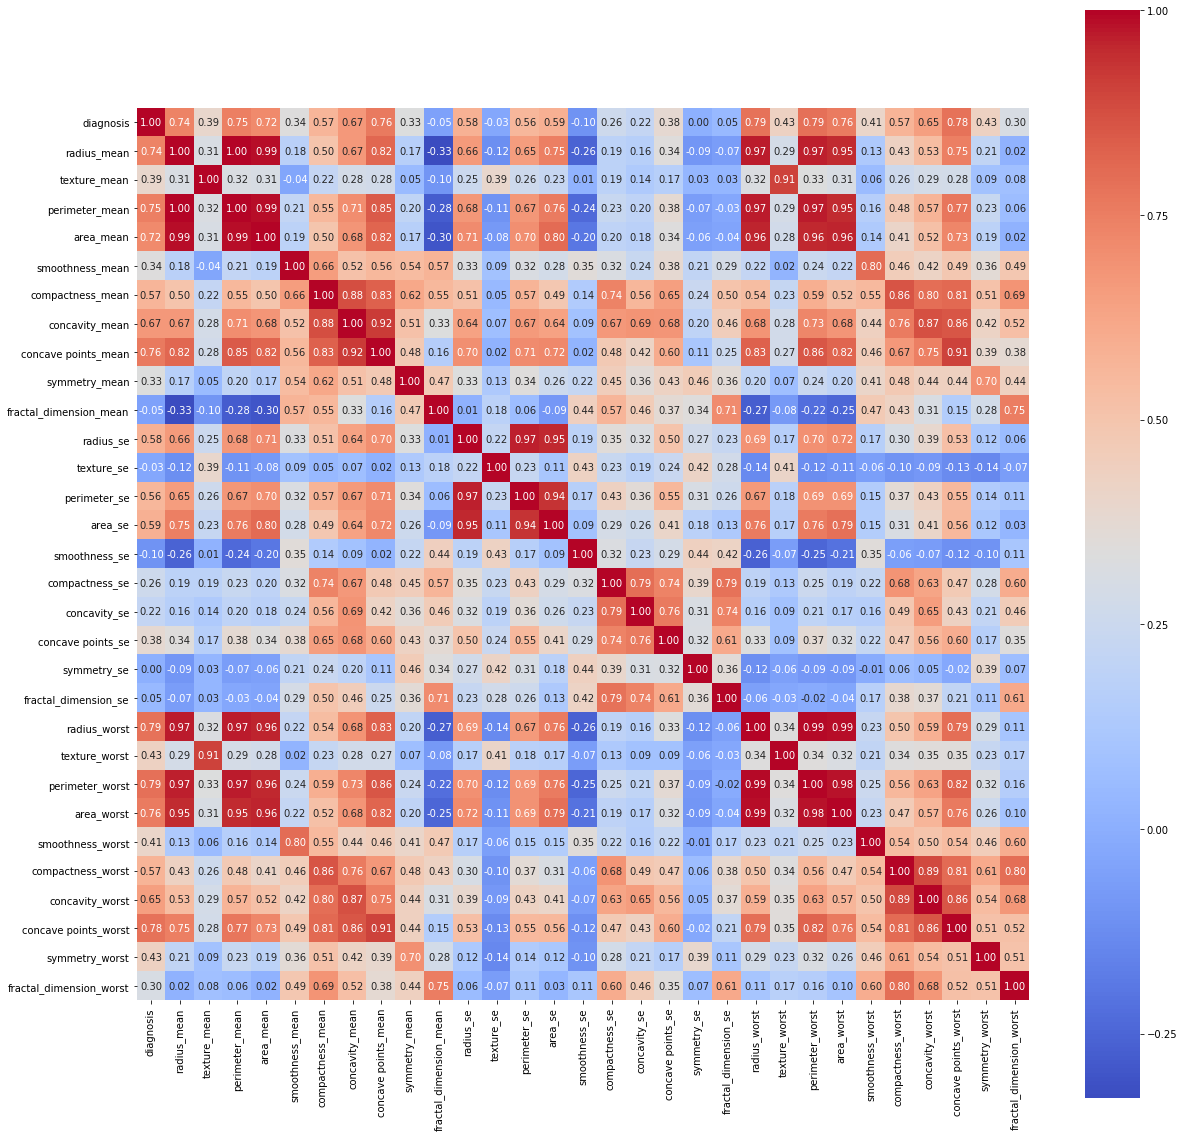

In [250]:
# .corr is used for find corelation
corr = df_trn.corr() 
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
           xticklabels= True, yticklabels= True,
           cmap= 'coolwarm')

# KEY STRATEGY

# For each cell, there are ten real-valued features are computed. As the description of the data says "The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius."
# So there is basically two approach to deal with this data:
# 1 to treat the 32 columns of data as a whole
# 2 to treat the the data as three separate parts (mean, se, worst) and then choose the best one

# To demonstrate our understanding, we will firstly use the first approach.  And then pick the "mean" part as the representation of second approach. And then choose the best one from them.

In [340]:
# list to store all models
models = []

# Approach 1: Treat 32 columns together

In [341]:
# From the graph of cell 66, and according to the discussion with professor. We know that radius_mean, \
# perimeter_mean and area_mean are highly related. So we only choose perimeter_mean. Similarly, we will choose \
# perimeter_se, perimeter_worst, texture_mean, texture_se, texture_worst etc

In [342]:
drop_list = ['area_mean','radius_mean','compactness_mean','concave points_mean','concave points_mean',
            'area_se','radius_se','compactness_se','concave points_se','concave points_se',
            'area_worst','radius_worst','compactness_worst','concave points_worst','concave points_worst']
df_approach1 = df_full.drop(drop_list,axis = 1 )        
df_approach1.head()

,diagnosis,texture_mean,perimeter_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,perimeter_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,texture_worst,perimeter_worst,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1.0,0.044296,0.400572,0.913744,0.725686,0.436245,-0.685782,-0.781898,0.112838,-0.267004,-0.124794,-0.796571,-0.504551,0.052562,0.525386,0.974533,0.514541,-0.103143,-0.208132
1,0.0,-1.435719,-0.416018,-1.907966,-0.831130,-1.732528,-0.990566,-1.356863,-0.866828,-0.770024,-0.509747,-0.527389,-0.648286,-1.650784,-0.591583,-1.587236,-0.737231,-0.957331,-0.819922
2,0.0,-0.044132,0.208070,-0.458325,-0.369108,0.037066,-0.606396,-0.487793,-0.344076,-0.569683,-0.548209,-0.645005,-0.370650,0.083503,0.054770,-0.046843,-0.440266,0.099080,0.042902
3,0.0,-0.725963,-0.362843,0.172912,-0.701061,-0.279377,-0.113069,-0.565809,-0.924994,-1.384716,-0.522678,-0.223044,-0.689516,-0.432712,-0.523373,-0.664929,-0.437382,0.641036,-0.310651
4,1.0,-0.146523,-0.247424,1.383436,0.424367,1.155518,0.704888,-0.586311,-0.479714,-0.169667,-0.094289,-0.377035,-0.057458,0.370108,-0.132881,2.026595,1.098382,1.616558,1.881599


In [343]:
# we will use four models: RandomForestClassifier, gradientBoosting, logisticRegression, kNeighborsClassifier
gradientBoosting = GradientBoostingClassifier()
logisticRegression = LogisticRegression()
kNeighborsClassifier = KNeighborsClassifier()

In [344]:
# split the data into training and validation part, the split ratio is random_state
X_full = df_approach1.drop('diagnosis', axis=1)
y = df_approach1['diagnosis']
x_trn_full, x_val_full, y_trn_full, y_val_full = train_test_split(X_full, y, random_state=1)

In [400]:
# test gradientBoosting
gradientBoosting.fit(x_trn_full, y_trn_full)
models.append(gradientBoosting)
y_prd = gradientBoosting.predict(x_val_full)
score1 = accuracy_score(y_val_full,y_prd)
print("gradientBoosting {}".format(score1))
print()

gradientBoosting 0.9230769230769231



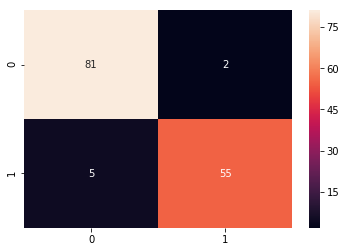

In [404]:
gB = confusion_matrix(y_val_full,y_prd)
sns.heatmap(gB,annot=True,fmt="d")

In [402]:
# test logisticRegression
logisticRegression.fit(x_trn_full, y_trn_full)
models.append(logisticRegression)
y_prd = logisticRegression.predict(x_val_full)
score2 = accuracy_score(y_val_full,y_prd)
print("logisticRegression {}".format(score2))
print()

logisticRegression 0.951048951048951



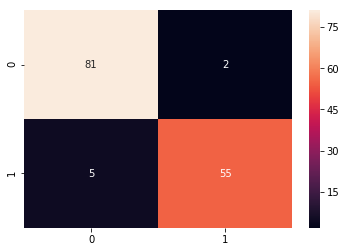

In [405]:
lR = confusion_matrix(y_val_full,y_prd)
sns.heatmap(lR,annot=True,fmt="d")

In [349]:
# test kNeighborsClassifier
kNeighborsClassifier.fit(x_trn_full, y_trn_full)
models.append(kNeighborsClassifier)
y_prd = kNeighborsClassifier.predict(x_val_full)
score3 = accuracy_score(y_val_full,y_prd)
print("kNeighborsClassifier {}".format(score3))
print()

kNeighborsClassifier 0.916083916083916



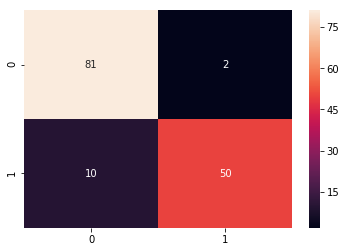

In [350]:
kNN = confusion_matrix(y_val_full,y_prd)
sns.heatmap(kNN,annot=True,fmt="d")

In [351]:
# test RandomForestClassifier with different n_estimators
test = [1, 10, 50, 100]
for index in range(0, 4):
    bagging_model=RandomForestClassifier(n_jobs = -1, n_estimators = test[index],
                                 bootstrap = True)
    
    bagging_model.fit(x_trn_full, y_trn_full)
    y_prd = bagging_model.predict(x_val_full)
    score = accuracy_score(y_val_full,y_prd)
    
    print("n_estimators {} score is {}".format(test[index], score))
    print()

n_estimators 1 score is 0.8811188811188811

n_estimators 10 score is 0.9090909090909091

n_estimators 50 score is 0.916083916083916

n_estimators 100 score is 0.9090909090909091



In [285]:
# Thus, we can see that we can choose logisticRegression to get a score of 0.95

# Approach 2: Treat 10 columns separately (we choose "mean" column as representation)

In [352]:
# seprate data set into three groups
features_mean= list(df_full.columns[1:11])
features_se= list(df_full.columns[11:21])
features_worst= list(df_full.columns[21:31])

In [353]:
df_mean = df_full[features_mean]
df_se = df_full[features_se]
df_worst = df_full[features_worst]
y = df_full['diagnosis']
y.head()

0    1.0
1    0.0
2    0.0
3    0.0
4    1.0
Name: diagnosis, dtype: float64

In [354]:
df_mean.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,0.378497,0.044296,0.400572,0.267417,0.913744,0.340350,0.725686,0.824140,0.436245,-0.685782
1,-0.351417,-1.435719,-0.416018,-0.395139,-1.907966,-1.270715,-0.831130,-0.959772,-1.732528,-0.990566
2,0.242110,-0.044132,0.208070,0.092252,-0.458325,-0.115812,-0.369108,-0.018808,0.037066,-0.606396
3,-0.337217,-0.725963,-0.362843,-0.418741,0.172912,-0.302863,-0.701061,-0.645343,-0.279377,-0.113069
4,-0.271894,-0.146523,-0.247424,-0.341964,1.383436,0.355511,0.424367,0.631459,1.155518,0.704888


In [355]:
df_se.head()

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,0.247908,-0.781898,0.112838,0.174761,-0.267004,-0.594561,-0.124794,-0.141153,-0.796571,-0.504551
1,-0.909129,-1.356863,-0.866828,-0.609365,-0.770024,-0.672247,-0.509747,-0.956095,-0.527389,-0.648286
2,-0.424478,-0.487793,-0.344076,-0.341094,-0.569683,-0.241898,-0.548209,0.011293,-0.645005,-0.370650
3,-0.935794,-0.565809,-0.924994,-0.638415,-1.384716,-0.705781,-0.522678,-0.532856,-0.223044,-0.689516
4,-0.426640,-0.586311,-0.479714,-0.354739,-0.169667,-0.118382,-0.094289,-0.260069,-0.377035,-0.057458


In [356]:
df_worst.head()

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.619345,0.052562,0.525386,0.484014,0.974533,-0.095323,0.514541,0.560244,-0.103143,-0.208132
1,-0.548601,-1.650784,-0.591583,-0.533845,-1.587236,-0.888789,-0.737231,-0.928004,-0.957331,-0.819922
2,-0.003974,0.083503,0.054770,-0.124592,-0.046843,0.309364,-0.440266,0.522178,0.099080,0.042902
3,-0.498901,-0.432712,-0.523373,-0.526989,-0.664929,-0.372749,-0.437382,-0.467856,0.641036,-0.310651
4,-0.124082,0.370108,-0.132881,-0.213193,2.026595,1.032201,1.098382,1.434251,1.616558,1.881599


# Data Group: Mean

In [357]:
# Similarly, we only choose those features are not co-related
df_mean = df_mean.drop(['radius_mean', 'area_mean', 'concave points_mean', 'compactness_mean'], axis=1)

In [358]:
df_mean.head()

,texture_mean,perimeter_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
0,0.044296,0.400572,0.913744,0.725686,0.436245,-0.685782
1,-1.435719,-0.416018,-1.907966,-0.831130,-1.732528,-0.990566
2,-0.044132,0.208070,-0.458325,-0.369108,0.037066,-0.606396
3,-0.725963,-0.362843,0.172912,-0.701061,-0.279377,-0.113069
4,-0.146523,-0.247424,1.383436,0.424367,1.155518,0.704888


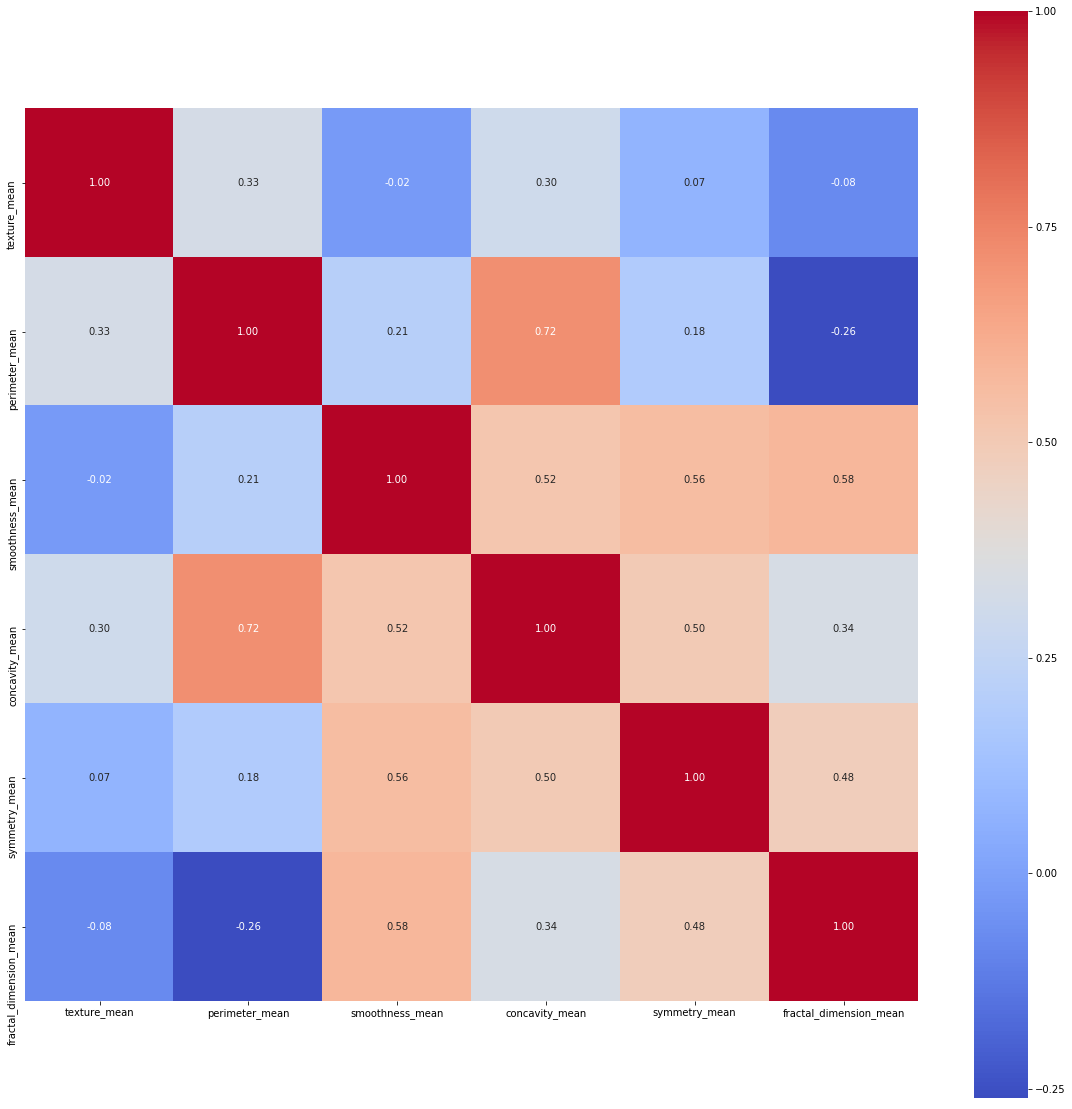

In [359]:
# corr = df_mean.corr() # .corr is used for find corelation
plt.figure(figsize=(20,20))
sns.heatmap(df_mean.corr(), cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
           xticklabels= True, yticklabels= True,
           cmap= 'coolwarm')

In [360]:
# From above, we can see that there are no features have corelation score higher than 0.75

In [368]:
# Simaliarly, we will use four models: RandomForestClassifier, gradientBoosting, logisticRegression, kNeighborsClassifier
gradientBoosting = GradientBoostingClassifier()
logisticRegression = LogisticRegression()
kNeighborsClassifier = KNeighborsClassifier()

In [369]:
# split data randomly
x_trn, x_val, y_trn, y_val = train_test_split(df_mean, y, random_state=1)

In [370]:
# test gradientBoosting
gradientBoosting.fit(x_trn, y_trn)
y_prd = gradientBoosting.predict(x_val)
score2 = accuracy_score(y_val,y_prd)
print("gradientBoosting {}".format(score2))
print()

gradientBoosting 0.8671328671328671



In [371]:
# test logisticRegression
logisticRegression.fit(x_trn, y_trn)
y_prd = logisticRegression.predict(x_val)
score2 = accuracy_score(y_val,y_prd)
print("logisticRegression {}".format(score2))
print()

logisticRegression 0.8811188811188811



In [372]:
# test kNeighborsClassifier
kNeighborsClassifier.fit(x_trn, y_trn)
y_prd = kNeighborsClassifier.predict(x_val)
score2 = accuracy_score(y_val,y_prd)
print("kNeighborsClassifier {}".format(score2))
print()

kNeighborsClassifier 0.8881118881118881



In [373]:
# test RandomForestClassifier with different n_estimators
test = [1, 10, 50, 100]
for index in range(0, 4):
    bagging_model=RandomForestClassifier(n_jobs = -1, n_estimators = test[index],
                                 bootstrap = True)
    bagging_model.fit(x_trn, y_trn)
    y_prd = bagging_model.predict(x_val)
    score = accuracy_score(y_val,y_prd)
    
    print("n_estimators {} score is {}".format(test[index], score))
    print()

n_estimators 1 score is 0.8531468531468531

n_estimators 10 score is 0.8671328671328671

n_estimators 50 score is 0.8881118881118881

n_estimators 100 score is 0.9020979020979021



In [134]:
# Thus, for mean group, we will choose RandomForestClassifier and n_estimators = 100 to get the score of 0.90

# Data Group: SE

In [374]:
# Similarly, we only choose those features are not co-related
df_se = df_se.drop(['radius_se', 'area_se', 'concave points_se', 'compactness_se'], axis=1)

In [375]:
df_se.head()

,texture_se,perimeter_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se
0,-0.781898,0.112838,-0.267004,-0.124794,-0.796571,-0.504551
1,-1.356863,-0.866828,-0.770024,-0.509747,-0.527389,-0.648286
2,-0.487793,-0.344076,-0.569683,-0.548209,-0.645005,-0.370650
3,-0.565809,-0.924994,-1.384716,-0.522678,-0.223044,-0.689516
4,-0.586311,-0.479714,-0.169667,-0.094289,-0.377035,-0.057458


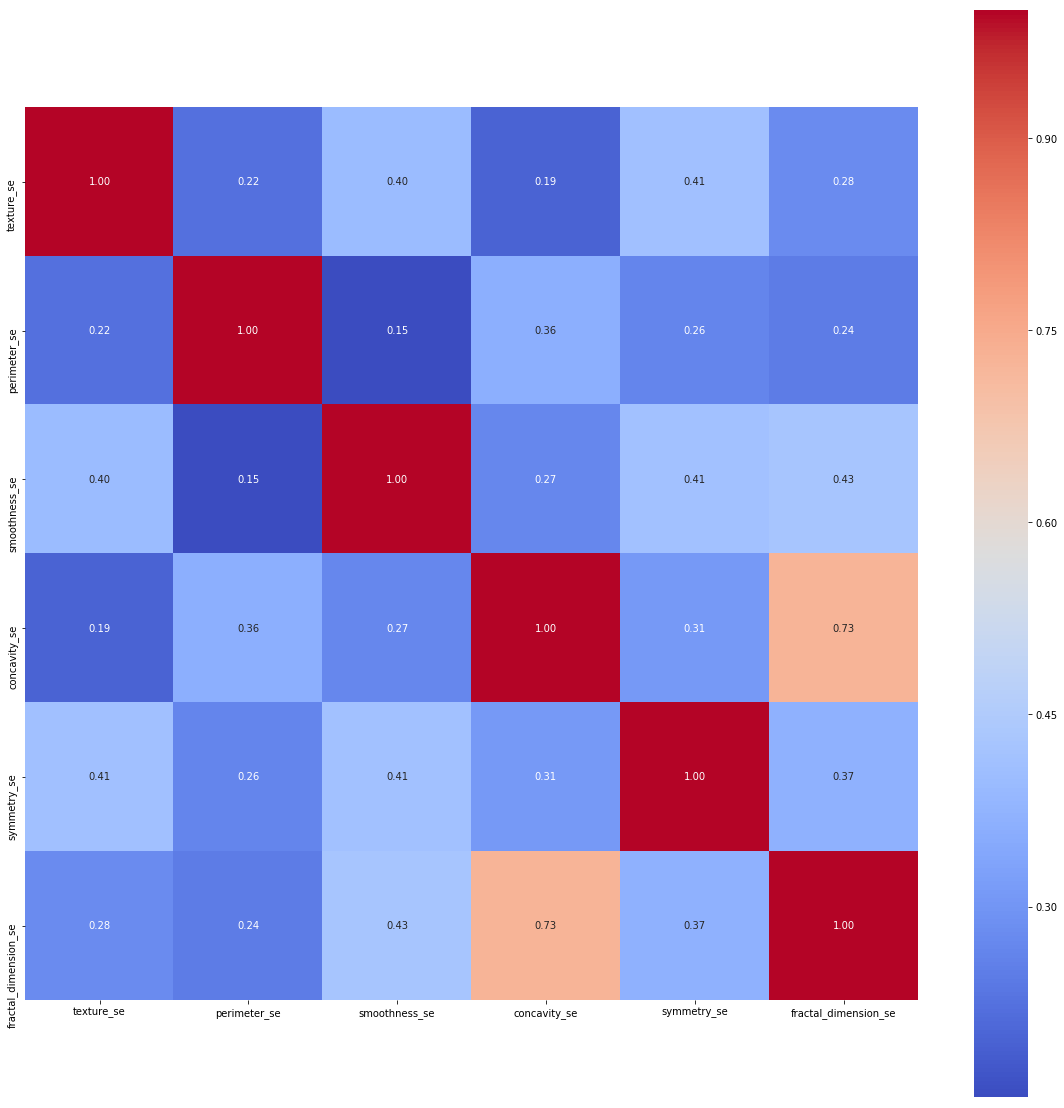

In [376]:
# corr = df_mean.corr() # .corr is used for find corelation
plt.figure(figsize=(20,20))
sns.heatmap(df_se.corr(), cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
           xticklabels= True, yticklabels= True,
           cmap= 'coolwarm')

In [377]:
# Simaliarly, we will use four models: RandomForestClassifier, gradientBoosting, logisticRegression, kNeighborsClassifier
gradientBoosting = GradientBoostingClassifier()
logisticRegression = LogisticRegression()
kNeighborsClassifier = KNeighborsClassifier()

In [378]:
# split data randomly
x_trn, x_val, y_trn, y_val = train_test_split(df_se, y, random_state=1)

In [379]:
# test gradientBoosting
gradientBoosting.fit(x_trn, y_trn)
y_prd = gradientBoosting.predict(x_val)
score2 = accuracy_score(y_val,y_prd)
print("gradientBoosting {}".format(score2))
print()

gradientBoosting 0.8111888111888111



In [380]:
# test logisticRegression
logisticRegression.fit(x_trn, y_trn)
y_prd = logisticRegression.predict(x_val)
score2 = accuracy_score(y_val,y_prd)
print("logisticRegression {}".format(score2))
print()

logisticRegression 0.7972027972027972



In [381]:
# test kNeighborsClassifier
kNeighborsClassifier.fit(x_trn, y_trn)
y_prd = kNeighborsClassifier.predict(x_val)
score2 = accuracy_score(y_val,y_prd)
print("kNeighborsClassifier {}".format(score2))
print()

kNeighborsClassifier 0.8181818181818182



In [382]:
# test RandomForestClassifier with different n_estimators
test = [1, 10, 50, 100]
for index in range(0, 4):
    bagging_model=RandomForestClassifier(n_jobs = -1, n_estimators = test[index],
                                 bootstrap = True)
    
    bagging_model.fit(x_trn, y_trn)
    y_prd = bagging_model.predict(x_val)
    score = accuracy_score(y_val,y_prd)
    
    print("n_estimators {} score is {}".format(test[index], score))
    print()

n_estimators 1 score is 0.7762237762237763

n_estimators 10 score is 0.8461538461538461

n_estimators 50 score is 0.8181818181818182

n_estimators 100 score is 0.8111888111888111



In [ ]:
# Thus, for se group, we will choose n-estimators = 10 to get the score of 0.84

# Data Group: Worst

In [383]:
# Similarly, we only choose those features are not co-related
df_worst = df_worst.drop(['radius_worst', 'area_worst', 'concave points_worst', 'compactness_worst'], axis=1)

In [384]:
df_worst.head()

,texture_worst,perimeter_worst,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,0.052562,0.525386,0.974533,0.514541,-0.103143,-0.208132
1,-1.650784,-0.591583,-1.587236,-0.737231,-0.957331,-0.819922
2,0.083503,0.054770,-0.046843,-0.440266,0.099080,0.042902
3,-0.432712,-0.523373,-0.664929,-0.437382,0.641036,-0.310651
4,0.370108,-0.132881,2.026595,1.098382,1.616558,1.881599


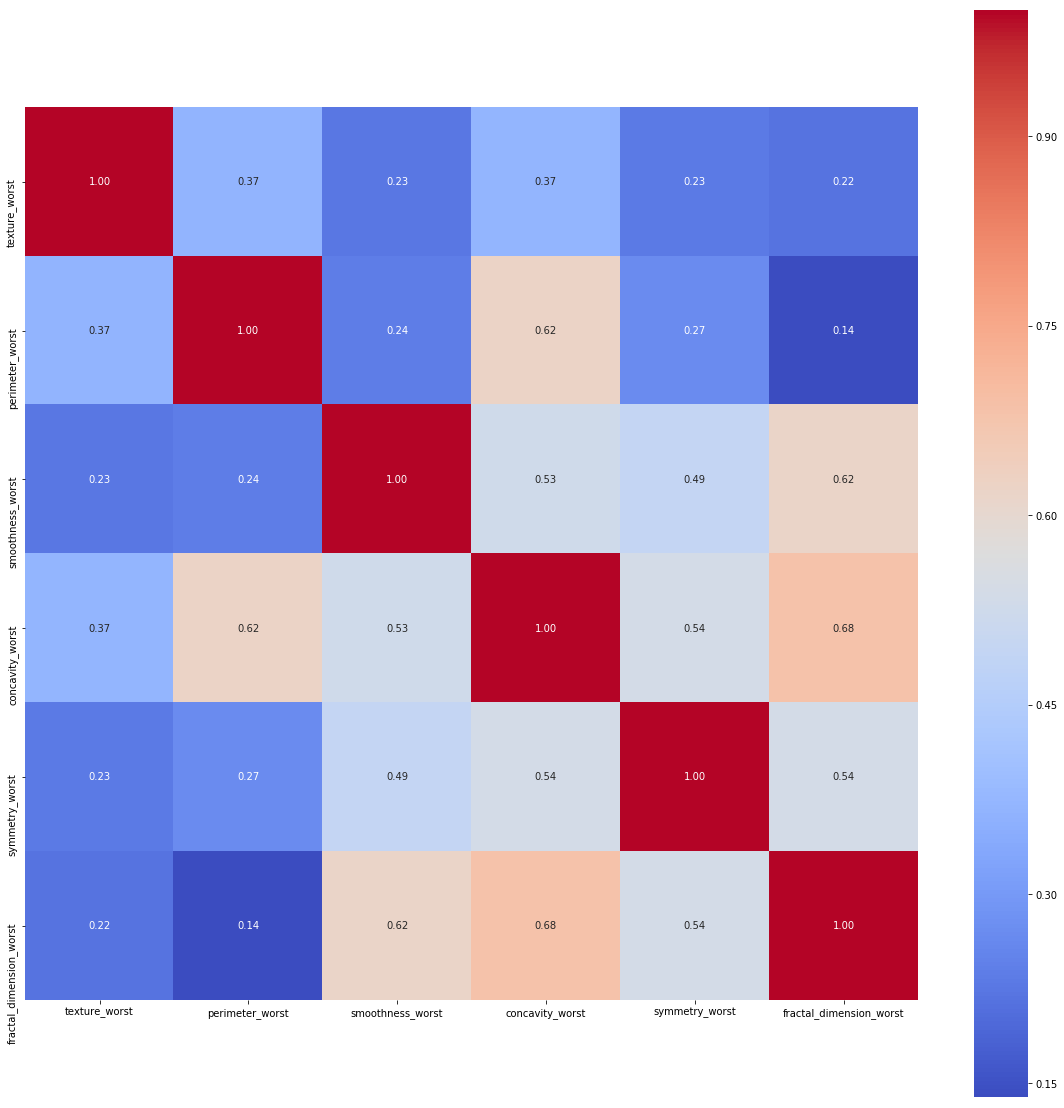

In [385]:
# corr = df_mean.corr() # .corr is used for find corelation
plt.figure(figsize=(20,20))
sns.heatmap(df_worst.corr(), cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
           xticklabels= True, yticklabels= True,
           cmap= 'coolwarm')

In [386]:
# Simaliarly, we will use four models: RandomForestClassifier, gradientBoosting, logisticRegression, kNeighborsClassifier
gradientBoosting = GradientBoostingClassifier()
logisticRegression = LogisticRegression()
kNeighborsClassifier = KNeighborsClassifier()

In [387]:
# split data randomly
x_trn, x_val, y_trn, y_val = train_test_split(df_worst, y, random_state=1)

In [388]:
# test gradientBoosting
gradientBoosting.fit(x_trn, y_trn)
y_prd = gradientBoosting.predict(x_val)
score2 = accuracy_score(y_val,y_prd)
print("gradientBoosting {}".format(score2))
print()

gradientBoosting 0.916083916083916



In [317]:
# test logisticRegression
logisticRegression.fit(x_trn, y_trn)
models.append(logisticRegression)
y_prd = logisticRegression.predict(x_val)
score2 = accuracy_score(y_val,y_prd)
print("logisticRegression {}".format(score2))
print()

logisticRegression 0.9440559440559441



In [389]:
# test kNeighborsClassifier
kNeighborsClassifier.fit(x_trn, y_trn)
y_prd = kNeighborsClassifier.predict(x_val)
score2 = accuracy_score(y_val,y_prd)
print("kNeighborsClassifier {}".format(score2))
print()

kNeighborsClassifier 0.9020979020979021



In [390]:
# test RandomForestClassifier with different n_estimators
test = [1, 10, 50, 100]
for index in range(0, 4):
    bagging_model=RandomForestClassifier(n_jobs = -1, n_estimators = test[index],
                                 bootstrap = True)
    
    bagging_model.fit(x_trn, y_trn)
    y_prd = bagging_model.predict(x_val)
    score = accuracy_score(y_val,y_prd)
    
    print("n_estimators {} score is {}".format(test[index], score))
    print()

n_estimators 1 score is 0.916083916083916

n_estimators 10 score is 0.916083916083916

n_estimators 50 score is 0.9300699300699301

n_estimators 100 score is 0.9230769230769231



In [391]:
# Thus, for worst group, we will choose logisticRegression to get the score of 0.94

# Compare two approaches and apply on the test data

In [392]:
# After comparing the two approaches, we will choose approach 1 of logisticRegression model to get a score of 0.97

In [393]:
x = df_tst.drop(['diagnosis','area_mean','radius_mean','compactness_mean','concave points_mean','concave points_mean',
            'area_se','radius_se','compactness_se','concave points_se','concave points_se',
            'area_worst','radius_worst','compactness_worst','concave points_worst','concave points_worst' ], axis=1)
y = df_tst['diagnosis']
x.head()

,texture_mean,perimeter_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,perimeter_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,texture_worst,perimeter_worst,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
483,-0.276839,-1.274654,-0.942962,-0.929185,-0.480189,0.187463,0.172629,-0.292592,1.313060,-0.715652,0.774870,-0.308617,-0.172162,-1.076794,0.281926,-0.999166,0.252769,-0.287930
484,0.940217,1.113698,-0.246964,1.566869,-0.421771,1.544110,0.450223,1.452886,-0.091663,1.127879,-0.461912,2.838813,0.519924,1.082381,-0.511503,1.174785,-0.970273,2.130970
485,-0.186084,-1.256929,-0.491062,-0.744752,1.557143,0.188880,0.241574,-0.147053,0.153347,-0.157619,-0.113916,0.044670,-0.009318,-1.083645,-0.393146,-0.693503,0.442049,0.071718
486,2.059536,-0.623772,-0.629123,-0.817697,0.155108,-0.824707,2.587520,0.610343,0.158680,-0.571750,-0.008426,0.033322,1.246207,-0.596349,-1.239179,-1.041693,-0.803642,-0.972870
487,2.485389,-0.600276,-1.378495,-1.114873,-0.403516,-0.453294,4.409122,0.008881,0.099344,-1.057501,1.318084,-0.249231,2.014830,-0.660686,-1.672278,-1.307136,-0.795553,-0.915238


In [396]:
print(models[1])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [397]:
# test logisticRegression
y_prd = models[1].predict(x)
score2 = accuracy_score(y,y_prd)
print("logisticRegression {}".format(score2))
print()

logisticRegression 0.9883720930232558



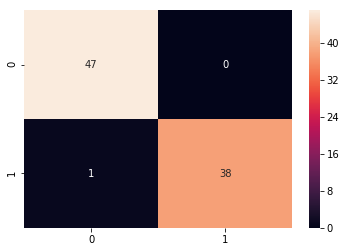

In [398]:
final = confusion_matrix(y,y_prd)
sns.heatmap(final,annot=True,fmt="d")

# Conclusion: By using the approach 1 of logisticRegression model and applying it to test data, we can have a score of 0.99